In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('./Data/spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping Last 3 columns
columns_to_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data.drop(columns=columns_to_drop,axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Renaming Columns
data.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Target']=le.fit_transform(data['Target'])
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Missing Values
data.isnull().sum()

Target    0
Text      0
dtype: int64

No Missing Values


In [14]:
# Checking Duplicate values
data.duplicated().sum()

403

In [15]:
# Removing Duplicate values
data=data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()


0

In [17]:
data.shape

(5169, 2)

### EDA

In [18]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

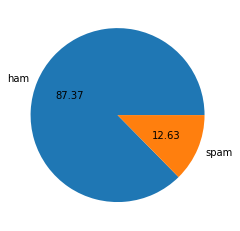

In [22]:
plt.pie(data['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f');

Data is imbalanced Because we have 88% ham and only 12% spam

In [23]:
import nltk


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
data['Total_Num_Characters']=data['Text'].apply(len)

In [27]:
data.head()

,Target,Text,Total_Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
data['Total_Num_Words']=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
data.head()

,Target,Text,Total_Num_Characters,Total_Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
data['Total_Num_Sentences']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
data.head()


,Target,Text,Total_Num_Characters,Total_Num_Words,Total_Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
data[['Total_Num_Characters', 'Total_Num_Words', 'Total_Num_Sentences']].describe()


,Total_Num_Characters,Total_Num_Words,Total_Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Ham Msg Describe

In [36]:
data[data['Target']==0][['Total_Num_Characters', 'Total_Num_Words', 'Total_Num_Sentences']].describe()

,Total_Num_Characters,Total_Num_Words,Total_Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### Spam Msg Describe


In [37]:
data[data['Target']==1][['Total_Num_Characters', 'Total_Num_Words', 'Total_Num_Sentences']].describe()

,Total_Num_Characters,Total_Num_Words,Total_Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


We Can see that spam msg has more number of characters and words and sentences compared to ham msg

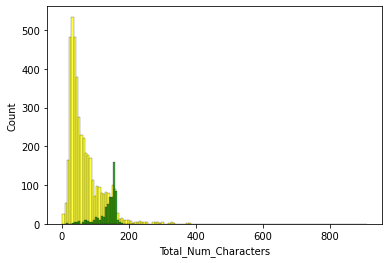

In [40]:
sns.histplot(data[data['Target']==0]['Total_Num_Characters'],color='yellow'); # ham
sns.histplot(data[data['Target']==1]['Total_Num_Characters'],color='green'); # spam



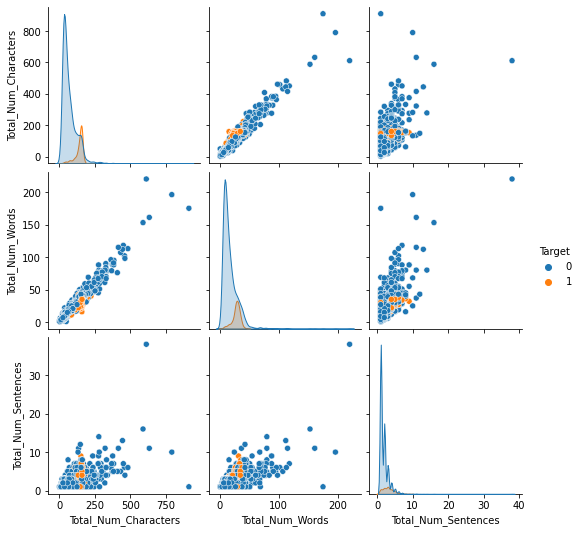

In [41]:
sns.pairplot(data,hue='Target');

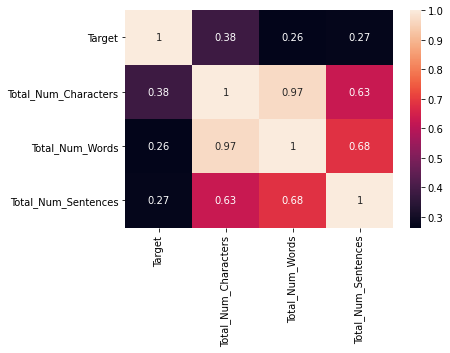

In [43]:
sns.heatmap(data.corr(),annot=True);

### Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.corpus import stopwords

In [61]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [62]:
def text_transformation(text):
    # To Lower Case
    text=text.lower()

    # Tokenization
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing Stopwords and punctuation
    text=y[:] #Cloning list
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [63]:
text_transformation('I Love Watching Movies and Eating Food')

'love watch movi eat food'

In [64]:
data['Transformed_Text']=data['Text'].apply(text_transformation)

In [65]:
data.head()

,Target,Text,Total_Num_Characters,Total_Num_Words,Total_Num_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'